# Import Libery 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
% matplotlib inline
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.cross_validation import cross_val_score
from scipy import stats
from numpy.random import seed
from numpy.random import randn
from numpy import mean
from numpy import std
import seaborn as sns

    
        
    


C:\Users\MANEESH\anaconda\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


# import data set 

In [2]:
df1 = pd.read_excel('DA-1.xlsx',sheet_name=0)
df2=pd.read_excel('DA-1.xlsx',sheet_name=1)
df2=df2.drop('Id',axis=1)
df3=df2.iloc[0:64]
df=pd.concat([df1,df3],axis=1)
df
df['timestamp']=pd.to_datetime(df['Date'])
df=df.drop('Date',axis=1)
df=df.set_index('timestamp')
df.head()


,Id,Type,CountA,CountB,CountC,FeedBack,User
timestamp,,,,,,,
2016-08-04 10:16:47,10121,Email,0.773005,0.662162,0.622776,Others,A1005
2016-08-04 10:18:28,10122,Email,0.193826,0.870958,0.328081,Others,A1002
2016-08-04 10:30:24,10123,Email,0.772299,0.322429,0.456233,Others,A1002
2016-08-04 10:41:56,10124,Email,0.485769,0.128755,0.575060,Others,A1002
2016-08-04 10:59:00,10125,Email,0.015268,0.216612,0.098125,Others,A1002


# data cleaning

In [3]:
df.shape

(64, 7)

In [4]:
d={'Undecided':'undecided','UNDECIDED':'undecided','nc':'NC','Others':'Others','NC':'NC','undecided':'undecided','NI':'NI'}
df['FeedBack']=df['FeedBack'].map(d)
df['FeedBack']

timestamp
2016-08-04 10:16:47       Others
2016-08-04 10:18:28       Others
2016-08-04 10:30:24       Others
2016-08-04 10:41:56       Others
2016-08-04 10:59:00       Others
2016-08-04 10:59:00       Others
2016-08-04 11:01:08       Others
2016-08-04 11:01:56       Others
2016-08-04 11:05:13    undecided
2016-08-04 11:07:48           NC
2016-08-04 11:12:14       Others
2016-08-04 11:36:14       Others
2016-08-04 13:35:02       Others
2016-08-04 13:47:40       Others
2016-08-04 14:17:27       Others
2016-08-04 14:17:49          NaN
2016-08-04 15:38:54           NC
2016-08-04 15:42:52           NC
2016-08-04 15:44:13           NC
2016-08-04 15:44:46           NC
2016-08-04 15:48:39           NC
2016-08-04 16:06:07           NC
2016-08-04 16:08:46           NC
2016-08-04 16:09:00           NC
2016-08-04 16:10:34           NC
2016-08-04 16:13:40           NC
2016-08-04 16:13:57           NC
2016-08-04 16:13:57           NC
2016-08-04 16:21:37       Others
2016-08-04 16:21:47           NI


In [5]:
#for check NA values
df.isnull().sum()

Id          0
Type        1
CountA      0
CountB      0
CountC      0
FeedBack    3
User        0
dtype: int64

In [6]:
#missing value treatement
df['FeedBack'] = df['FeedBack'].fillna(df['FeedBack'].mode()[0])
df['Type'] = df['Type'].fillna(df['Type'].mode()[0])


In [7]:
df.isnull().sum()

Id          0
Type        0
CountA      0
CountB      0
CountC      0
FeedBack    0
User        0
dtype: int64

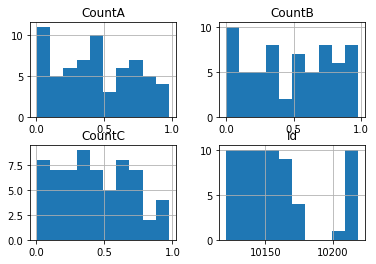

In [8]:
#check data distubusation
df.hist()
plt.show()

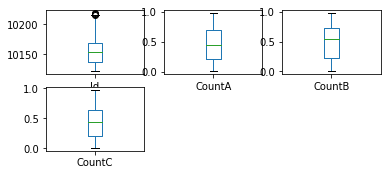

In [9]:
#for cheching outlier plot Box plot
df.plot(kind='box',subplots=True, layout=(3,3),sharex=False, sharey=False)
plt.show()

In [10]:
df.head()

,Id,Type,CountA,CountB,CountC,FeedBack,User
timestamp,,,,,,,
2016-08-04 10:16:47,10121,Email,0.773005,0.662162,0.622776,Others,A1005
2016-08-04 10:18:28,10122,Email,0.193826,0.870958,0.328081,Others,A1002
2016-08-04 10:30:24,10123,Email,0.772299,0.322429,0.456233,Others,A1002
2016-08-04 10:41:56,10124,Email,0.485769,0.128755,0.575060,Others,A1002
2016-08-04 10:59:00,10125,Email,0.015268,0.216612,0.098125,Others,A1002


In [11]:
#For Seeing Linear Relation Ship with FeedBack and other Atribute

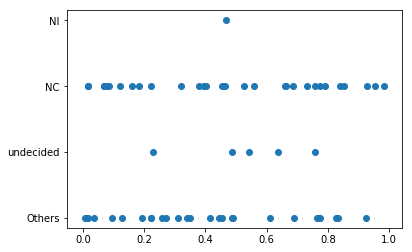

In [12]:
plt.scatter(df['CountA'],df['FeedBack'])

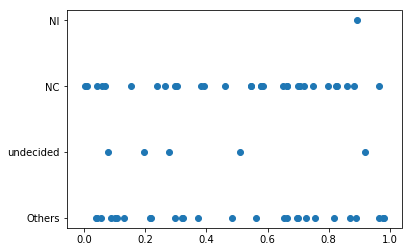

In [13]:
ccc

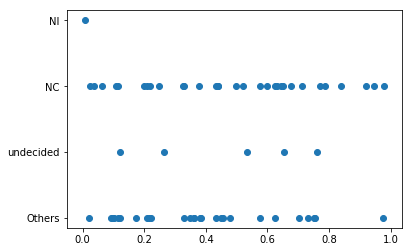

In [14]:
plt.scatter(df['CountC'],df['FeedBack'])

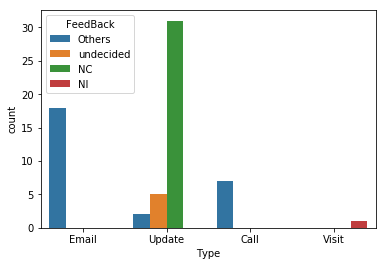

In [15]:
sns.countplot(x='Type',hue='FeedBack',data=df)

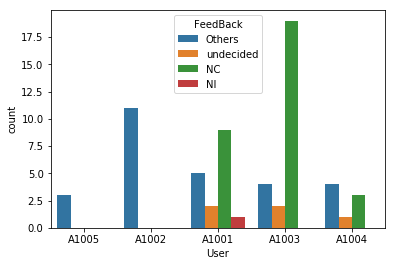

In [16]:
sns.countplot(x='User',hue='FeedBack',data=df)

In [17]:
hu=pd.get_dummies(df.Type,drop_first=True)
df=pd.concat([df,hu],axis=1)
df.drop('Type',axis=1,inplace=True)
df.head()

,Id,CountA,CountB,CountC,FeedBack,User,Email,Update,Visit
timestamp,,,,,,,,,
2016-08-04 10:16:47,10121,0.773005,0.662162,0.622776,Others,A1005,1,0,0
2016-08-04 10:18:28,10122,0.193826,0.870958,0.328081,Others,A1002,1,0,0
2016-08-04 10:30:24,10123,0.772299,0.322429,0.456233,Others,A1002,1,0,0
2016-08-04 10:41:56,10124,0.485769,0.128755,0.575060,Others,A1002,1,0,0
2016-08-04 10:59:00,10125,0.015268,0.216612,0.098125,Others,A1002,1,0,0


In [18]:
from numpy.random import seed
from numpy.random import randn
from numpy import mean
from numpy import std

dm, ds = mean(df.CountA), std(df.CountA)
# identify outliers
cf = ds * 3
lower, upper = dm- cf, dm + cf
# identify outliers
df[(df.CountA>upper)|(df.CountA<lower)]


,Id,CountA,CountB,CountC,FeedBack,User,Email,Update,Visit
timestamp,,,,,,,,,


In [19]:
#identify outlier for countB
dm, ds = mean(df.CountB), std(df.CountB)
cf = ds * 3
lower, upper = dm- cf, dm + cf
df[(df.CountB>upper)|(df.CountB<lower)]
df=df.drop('User',axis=1)

In [20]:
#identify outlier for countC
dm, ds = mean(df.CountC), std(df.CountC)
cf = ds * 3
lower, upper = dm- cf, dm + cf
df[(df.CountC>upper)|(df.CountC<lower)]


,Id,CountA,CountB,CountC,FeedBack,Email,Update,Visit
timestamp,,,,,,,,


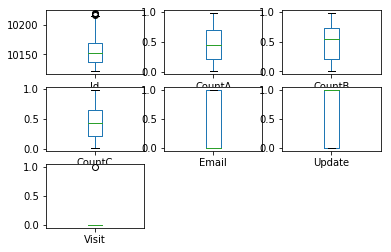

In [21]:
df.plot(kind='box',subplots=True, layout=(3,3),sharex=False, sharey=False)
plt.show()

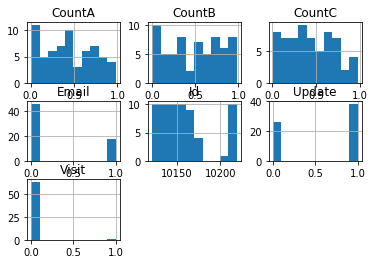

In [22]:
df.hist()
plt.show()

In [23]:
#ax = sns.countplot(y="CountB", hue="who", data=df)

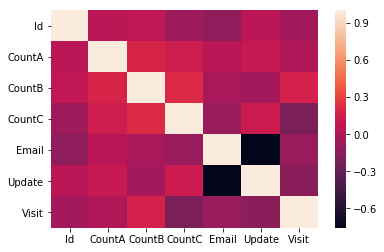

In [24]:
sns.heatmap(df.corr())

# model building

In [25]:
x=df.drop('FeedBack',axis=1)
y=df['FeedBack']
from sklearn.model_selection import train_test_split

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=109) # 70% training and 30% test

In [26]:
#Import svm model
from sklearn import svm

#Create a svm Classifier
clf = svm.SVC(kernel='linear') # Linear Kernel

#Train the model using the training sets
clf.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.75


#  Box  Plots Comparing Algorithm Performance

In [27]:
import numpy 
from numpy import arange 
from matplotlib import pyplot 
from pandas import read_csv 
from pandas import set_option 
from pandas.tools.plotting import scatter_matrix 
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import train_test_split 
from sklearn.model_selection import KFold 
from sklearn.model_selection import cross_val_score 
from sklearn.model_selection import GridSearchCV 
from sklearn.linear_model import LinearRegression 
from sklearn.linear_model import Lasso 
from sklearn.linear_model import ElasticNet 
from sklearn.tree import DecisionTreeRegressor 
from sklearn.neighbors import KNeighborsRegressor 
from sklearn.svm import SVC 
from sklearn.pipeline import Pipeline 
from sklearn.ensemble import RandomForestRegressor 
from sklearn.ensemble import GradientBoostingRegressor 
from sklearn.ensemble import ExtraTreesRegressor 
from sklearn.ensemble import AdaBoostRegressor 
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LogisticRegression 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB 


In [28]:
# Test options and evaluation metric
num_folds = 10
seed = 7 
scoring = 'accuracy'


In [29]:
# Spot-Check Algorithms 
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier())) 
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))


In [30]:
results = [] 
names = [] 
for name, model in models:
    kfold = KFold(n_splits=num_folds, random_state=seed) 
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results) 
    names.append(name) 
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)


LR: 0.845000 (0.198053)
LDA: 0.800000 (0.241868)
KNN: 0.560000 (0.214243)
CART: 0.720000 (0.259037)
NB: 0.825000 (0.191377)

C:\Users\MANEESH\anaconda\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\Users\MANEESH\anaconda\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\Users\MANEESH\anaconda\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\Users\MANEESH\anaconda\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\Users\MANEESH\anaconda\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\Users\MANEESH\anaconda\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\Users\MANEESH


SVM: 0.630000 (0.256125)


LR = LogisticRegression
LDA = LinearDiscriminalysis
KNN = KNeighborsClassifier
CART = DecisionTreeClassifier
NB = GaussianNB
'SVM = SVC


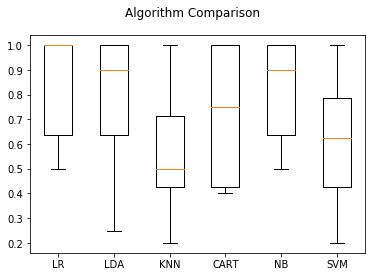

In [31]:
# Compare Algorithms
print("LR = LogisticRegression")
print("LDA = LinearDiscriminalysis")
print("KNN = KNeighborsClassifier")
print("CART = DecisionTreeClassifier")
print("NB = GaussianNB")
print("'SVM = SVC")
fig = pyplot.figure()
fig.suptitle('Algorithm Comparison') 
ax = fig.add_subplot(111)
pyplot.boxplot(results) 
ax.set_xticklabels(names) 
pyplot.show()


# From these results, it would suggest that both logistic regression , linear discriminant analysis, GaussianNB are have higher accurecy more than KNN and  SVM.